In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, asc, desc, and_, select

In [67]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [68]:
# reflect an existing database into a new model
#https://docs.sqlalchemy.org/en/14/orm/extensions/automap.html
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [69]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [71]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [72]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(desc(measurement.date)).first()

('2017-08-23',)

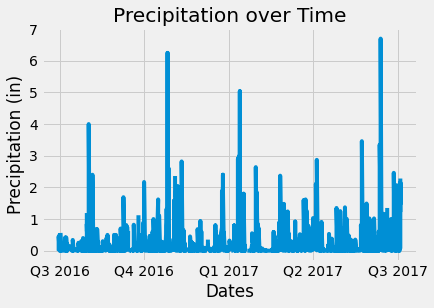

date
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
2017-08-22    0.00
              ... 
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.22
2016-08-24    2.15
2016-08-24    1.45
Name: prcp, Length: 2223, dtype: float64

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
stmt = select(measurement.date, measurement.prcp).order_by(desc(measurement.date)).where(measurement.date > "2016-08-23")

# Save the query results as a Pandas DataFrame and set the index to the date column
weather_data = pd.read_sql(stmt, engine)
weather_data = weather_data.set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
dates = weather_data.index
precipitation = weather_data['prcp']

plt.plot(dates, precipitation)
plt.xlabel("Dates")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation over Time")
plt.xticks(np.arange(1,362,90),['Q3 2016','Q4 2016','Q1 2017','Q2 2017','Q3 2017'])
plt.show()
precipitation



In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [130]:
# Design a query to calculate the total number stations in the dataset
stmt = select(station.name, station.station).distinct()

# Save the query results as a Pandas DataFrame and set the index to the date column
stations = pd.read_sql(stmt, engine)
stations.count()

name       9
station    9
dtype: int64

In [131]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('select measurement.station, count(*) from measurement group by station order by count(*) desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = 'USC00519281'
stmt = select(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).select_from(measurement).where(measurement.station == active)
result = pd.read_sql(stmt, engine)
result

,min_1,avg_1,max_1
0,54.0,71.663781,85.0


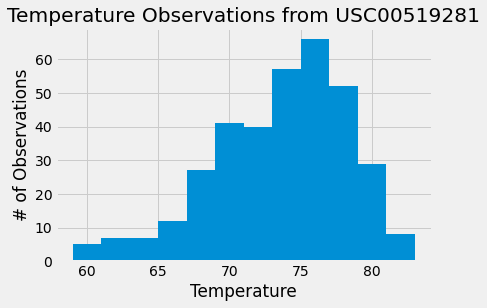

In [133]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active = 'USC00519281'
stmt = select(measurement.tobs).where((measurement.station == active) & (measurement.date > "2016-08-23"))
result = pd.read_sql(stmt, engine)
x_values = result["tobs"]
plt.hist(x_values,12)
plt.xlabel("Temperature")
plt.ylabel("# of Observations")
plt.title("Temperature Observations from USC00519281")
plt.show()

# Close session

In [135]:
# Close Session
session.close()